In [81]:
!pip install numpy pandas matplotlib seaborn scikit-learn reviews

### **IMPORTING LIBRARIES**

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from reviews import *

# **LOADING THE DATA**

In [85]:
df=pd.read_csv("/content/archive.zip")

In [84]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk Category
0,64,1,66,160,83,160.0,1.80,0.012,0,1
1,21,1,94,98,46,296.0,6.75,1.060,1,1
2,55,1,64,160,77,270.0,1.99,0.003,0,1
3,64,1,70,120,55,270.0,13.87,0.122,1,1
4,55,1,64,112,65,300.0,1.08,0.003,0,0


In [83]:
df.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk Category
1314,44,1,94,122,67,204.0,1.63,0.006,0,0
1315,66,1,84,125,55,149.0,1.33,0.172,1,1
1316,45,1,85,168,104,96.0,1.24,4.250,1,1
1317,54,1,58,117,68,443.0,5.80,0.359,1,1
1318,51,1,94,157,79,134.0,50.89,1.770,1,1


In [ ]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [87]:
print(df.dtypes)

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object


# DATA CLEANING




In [ ]:
print(df.isnull().sum())

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [88]:
df.drop_duplicates()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [89]:
len(df)

1319

# **EXPLORATORY DATA ANALYSIS**

In [90]:
top_five=df.sort_values(by='Heart rate',ascending=True)
top_five.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1060,63,0,20,110,90,122.0,0.68,1.510,positive
708,42,1,20,110,90,108.0,4.93,0.010,negative
1024,65,1,36,106,58,88.0,1.25,0.088,positive
1313,86,0,40,179,68,147.0,5.22,0.011,negative
995,32,1,40,179,68,167.0,9.63,0.004,positive


In [ ]:
top_five=df.sort_values(by='Blood sugar',ascending=True)
top_five.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
743,49,1,85,119,76,35.0,5.680,0.050,positive
1196,54,0,60,104,60,50.0,8.140,0.006,positive
267,33,1,90,139,67,50.0,0.813,0.004,positive
532,53,1,51,118,50,60.0,1.780,0.007,negative
187,70,1,61,145,68,61.0,286.900,0.004,positive


In [ ]:
least_five=df.sort_values(by='Heart rate',ascending=False)
least_five.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1069,32,0,1111,141,95,82.0,2.66,0.008,negative
717,70,0,1111,141,95,138.0,3.87,0.028,positive
63,45,1,1111,141,95,109.0,1.33,1.010,positive
21,48,1,135,98,60,100.0,94.79,0.004,positive
1012,65,1,135,98,60,162.0,7.67,0.025,positive


In [ ]:
least_five=df.sort_values(by='Blood sugar',ascending=False)
least_five.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1274,70,1,103,126,75,541.0,0.665,0.014,negative
345,29,1,108,111,70,541.0,1.500,0.089,positive
338,70,1,60,104,60,500.0,5.230,0.095,positive
1267,60,0,60,209,75,500.0,1.490,0.019,positive
1136,63,1,71,112,68,462.0,2.540,0.013,negative


# **DATA VISUALIZATION**

**AVERAGE HEART RATE**

In [ ]:
avg_price_df=df.groupby('Age')['Heart rate'].mean()

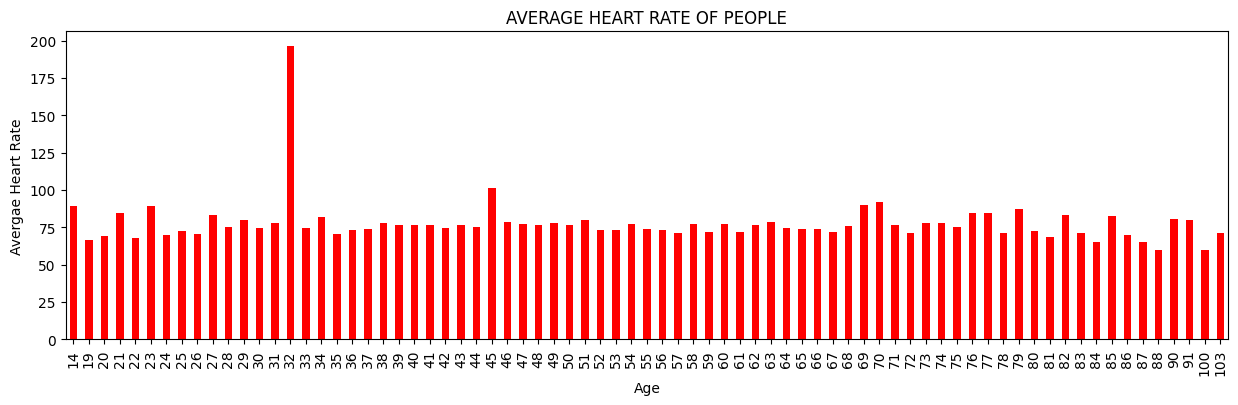

In [ ]:
avg_price_df.plot(kind='bar',figsize=(15,4),color='red')
plt.xlabel('Age')
plt.ylabel('Avergae Heart Rate')
plt.title("AVERAGE HEART RATE OF PEOPLE")
plt.show()

**AVERAGE BLOOD SUGAR**

In [ ]:
avg_rating_df=df.groupby('Age')['Blood sugar'].mean()

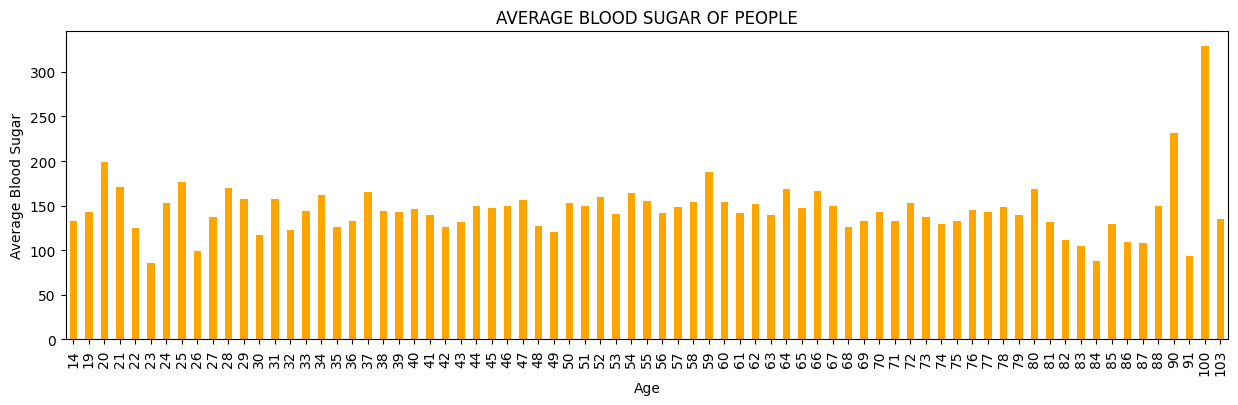

In [ ]:
avg_rating_df.plot(kind='bar',figsize=(15,4),color='orange')
plt.xlabel("Age")
plt.ylabel("Average Blood Sugar")
plt.title("AVERAGE BLOOD SUGAR OF PEOPLE")
plt.show()


**AGE VS HEART RATE**

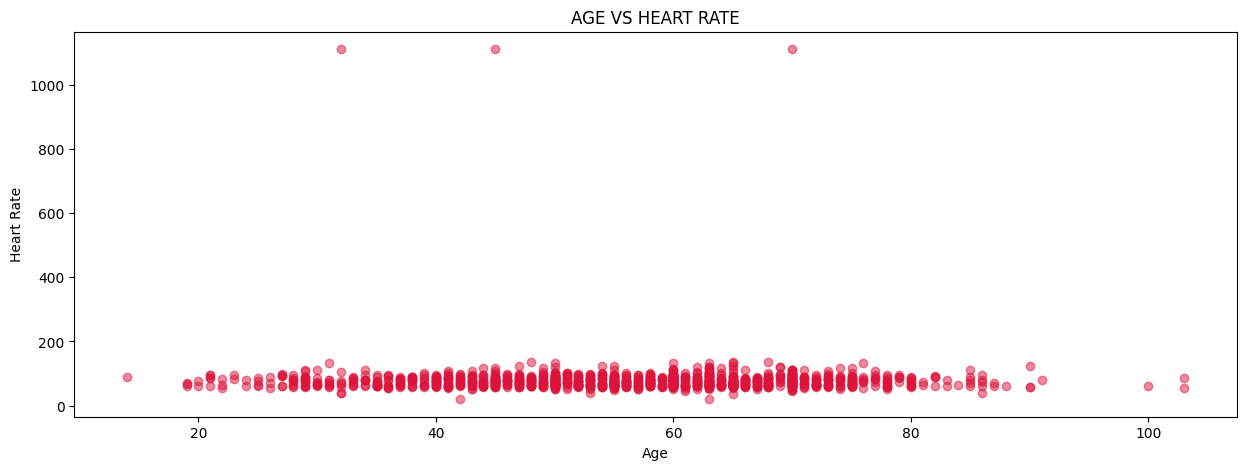

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(df['Age'],df['Heart rate'],color='crimson',alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.title("AGE VS HEART RATE")
plt.show()

**SYATOLIC AND DIASTOLIC BLOOD PRESSURE**

In [ ]:
Systolic_Blood_Pressure=df['Systolic blood pressure'].value_counts()
Diastolic_Blood_Pressure=df['Diastolic blood pressure'].value_counts()
print(Systolic_Blood_Pressure)
print(Diastolic_Blood_Pressure)

Systolic blood pressure
150    50
130    41
125    41
120    38
140    32
       ..
42      1
159     1
161     1
183     1
204     1
Name: count, Length: 116, dtype: int64
Diastolic blood pressure
75     69
68     67
80     57
70     44
65     43
       ..
38      1
109     1
102     1
43      1
154     1
Name: count, Length: 73, dtype: int64


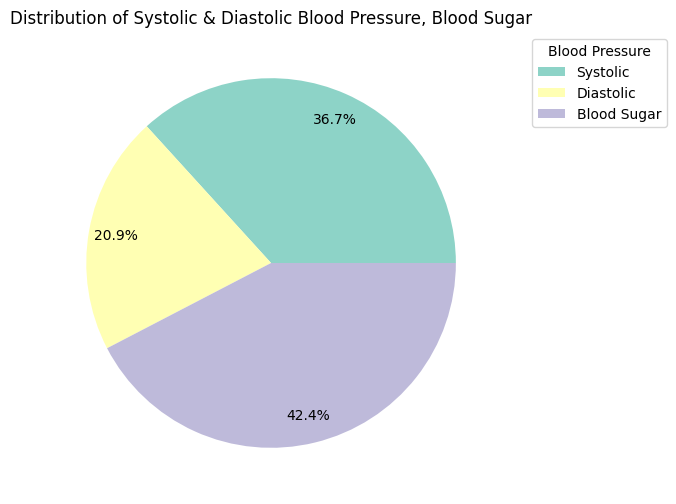

In [ ]:
bp_distribution = df[['Systolic blood pressure', 'Diastolic blood pressure','Blood sugar']].mean()
plt.figure(figsize=(10,6))
plt.pie(bp_distribution, autopct='%1.1f%%', labeldistance=1.2, pctdistance=0.85,colors=sns.color_palette('Set3', len(bp_distribution)))
plt.title("Distribution of Systolic & Diastolic Blood Pressure, Blood Sugar")
plt.legend(labels=['Systolic', 'Diastolic','Blood Sugar'], title="Blood Pressure", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


**Heart rate VS CKMB**

In [ ]:
cardiac_df = df.groupby('Age')[['Heart rate', 'CK-MB']].mean()
cardiac_df = cardiac_df.reset_index()
print(cardiac_df.head())

   Age  Heart rate    CK-MB
0   14   89.000000    2.620
1   19   66.666667  112.282
2   20   69.000000    4.160
3   21   84.600000    6.644
4   22   67.666667    3.210


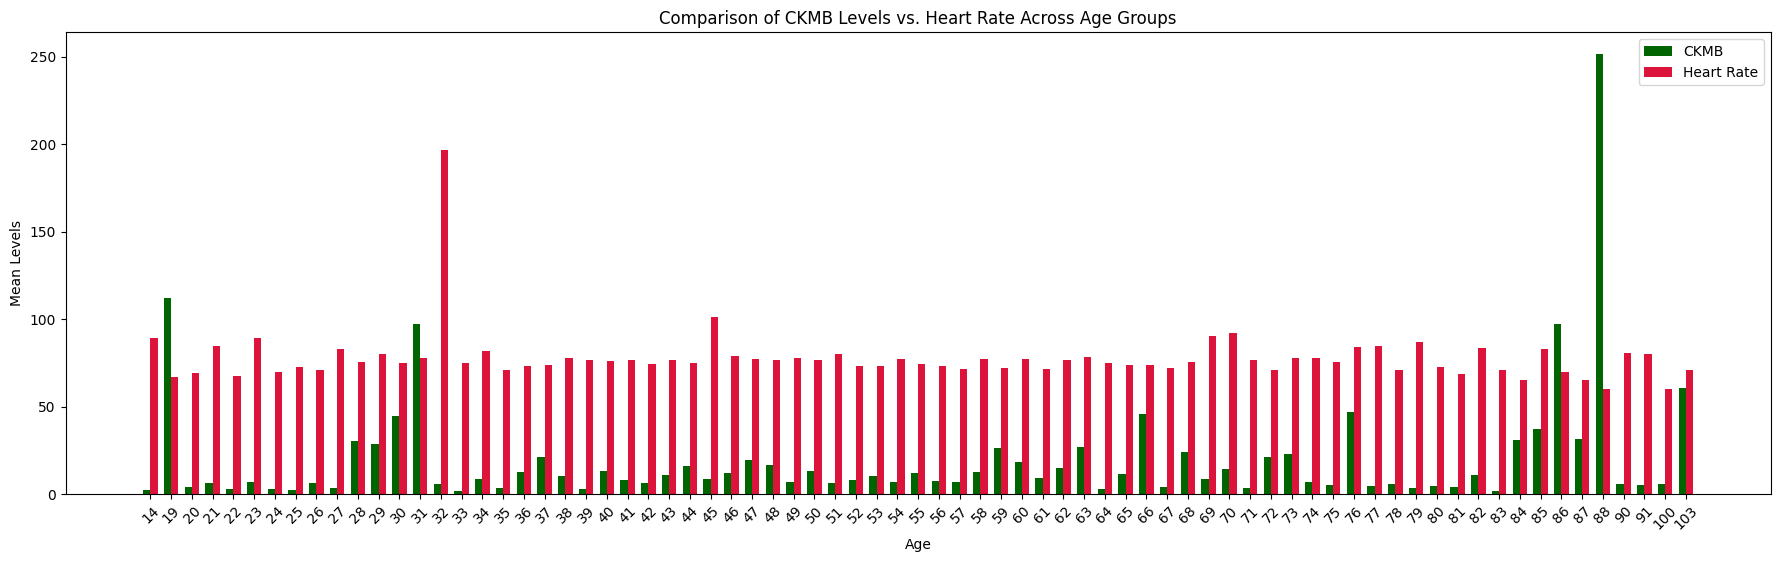

In [ ]:
cardiac_df = df.groupby('Age')[['CK-MB', 'Heart rate']].mean().reset_index()
fig, ax = plt.subplots(figsize=(22,6))
bar_width = 0.35
index = range(len(cardiac_df))
ax.bar(index, cardiac_df['CK-MB'], bar_width, label='CKMB', color='darkgreen')
ax.bar([i + bar_width for i in index], cardiac_df['Heart rate'], bar_width, label='Heart Rate', color='crimson')
plt.xlabel("Age")
plt.ylabel("Mean Levels")
plt.title("Comparison of CKMB Levels vs. Heart Rate Across Age Groups")
plt.xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(cardiac_df['Age'])
plt.xticks(rotation=45)
plt.legend()
plt.show()

**CORRELATION BETWEEN MEDICAL PARAMETERS**

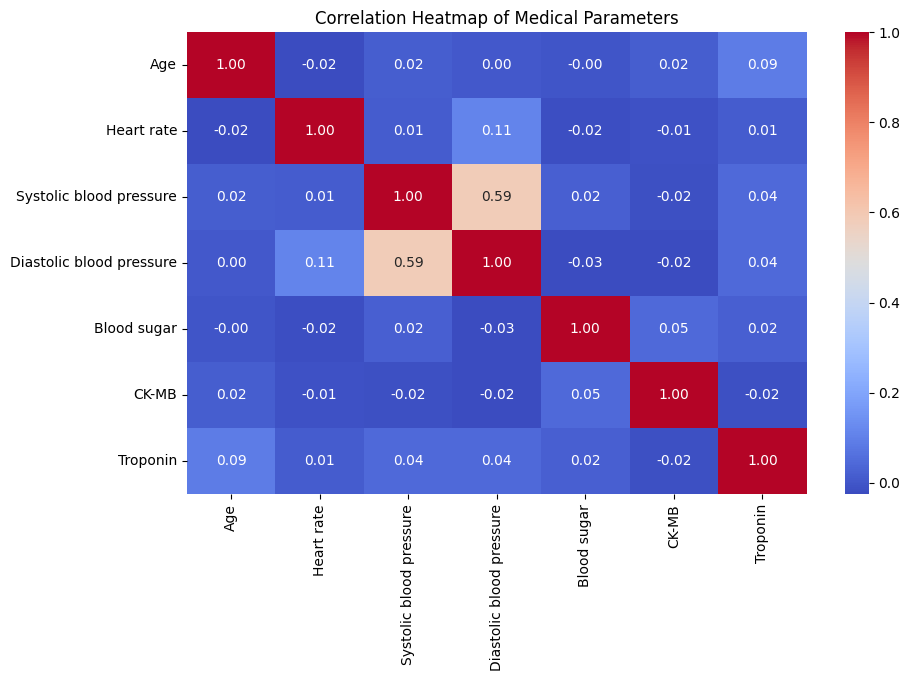

In [ ]:
# Compute correlation matrix for all medical parameters
corr_matrix = df[['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']].corr()
# Create heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Medical Parameters")
plt.show()


TROPONIN LEVELS IMPACT ON RESULT

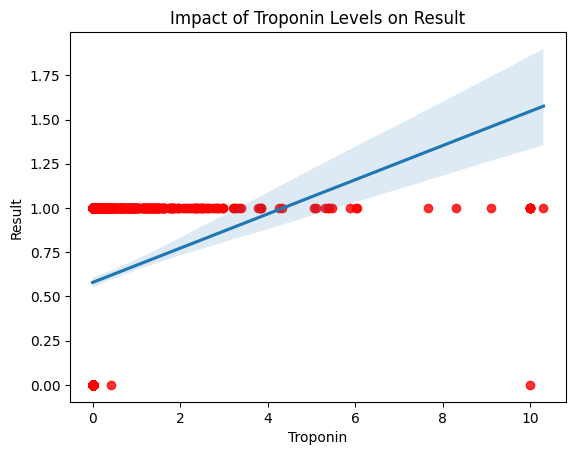

In [ ]:
df['Result'] = df['Result'].astype('category').cat.codes
# Create a regression plot
sns.regplot(x='Troponin', y='Result', data=df, scatter_kws={'color': 'red'})
# Set the title
plt.title('Impact of Troponin Levels on Result')
# Show the plot
plt.show()


MEDICAL PARAMETERS RELATIONSHIP BY AGE

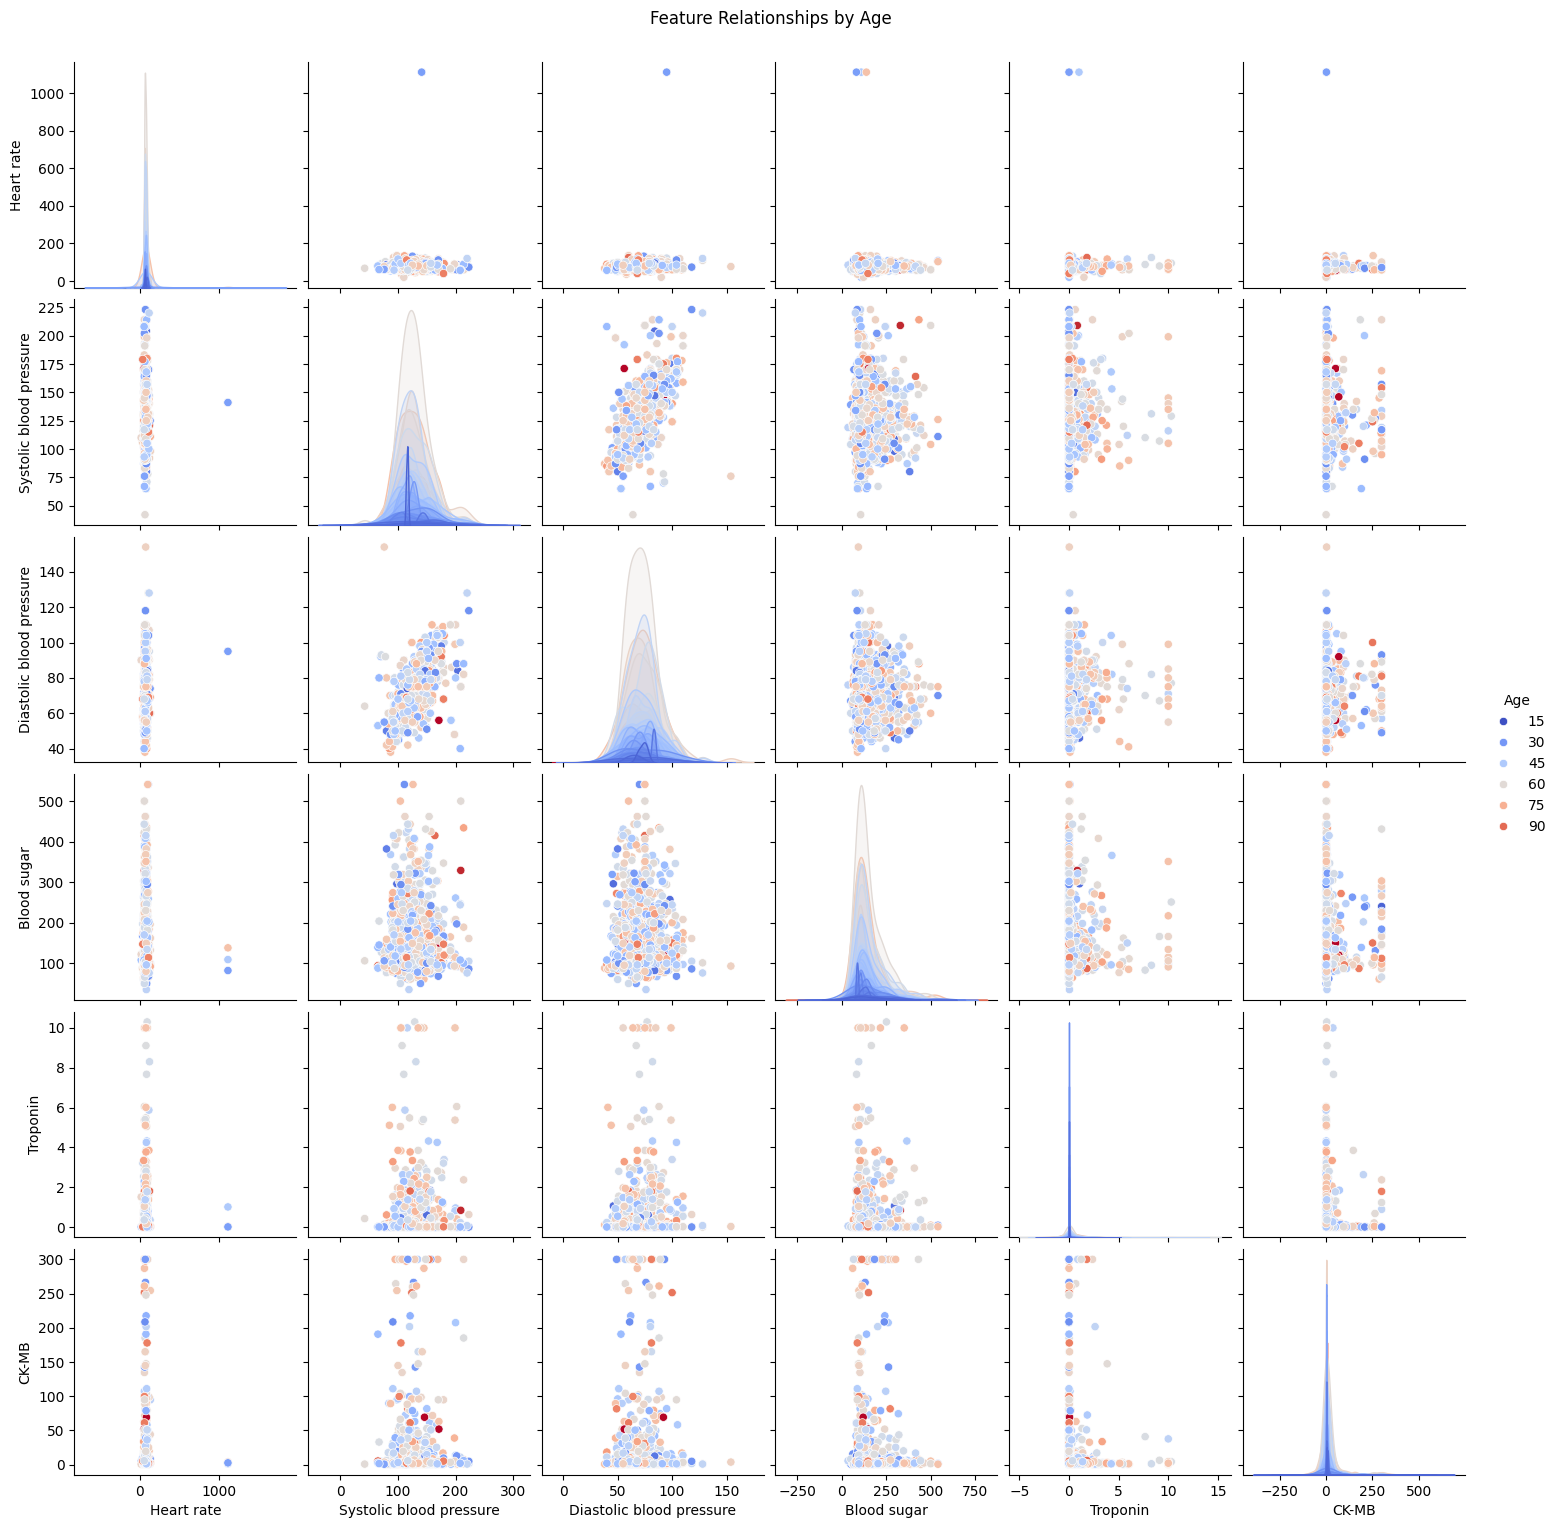

In [ ]:
sns.pairplot(df, vars=['Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'Troponin', 'CK-MB'], hue='Age', palette='coolwarm')
plt.suptitle("Feature Relationships by Age", y=1.02)
plt.show()


Troponin Level Distribution Across Medical Results


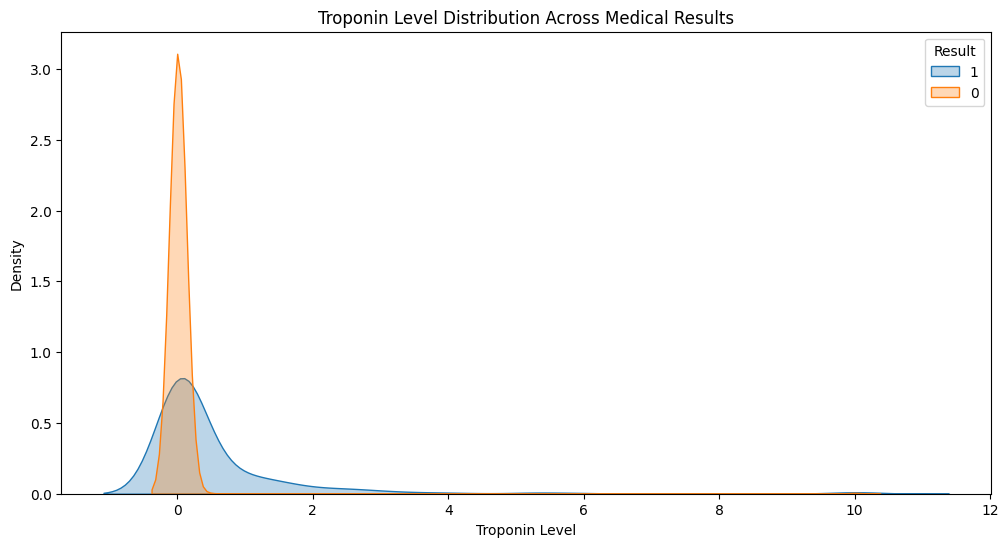

In [ ]:
df['Result'] = df['Result'].astype('category').cat.codes
plt.figure(figsize=(12, 6))
top_results = df['Result'].value_counts().head(3).index
for result in top_results: sns.kdeplot(df[df['Result'] == result]['Troponin'], label=result, fill=True, alpha=0.3)
plt.title('Troponin Level Distribution Across Medical Results')
plt.xlabel('Troponin Level')
plt.ylabel('Density')
plt.legend(title='Result')
plt.show()

**MEACHINE LEARNING PART**

PREDICTING BLOOD SUGAR LEVELS BASED ON SOME FEATURES

In [91]:
new_df=df.copy()
new_df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [92]:
new_df['Age']=pd.factorize(new_df['Age'])[0]
new_df.head(5)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,0,1,66,160,83,160.0,1.80,0.012,negative
1,1,1,94,98,46,296.0,6.75,1.060,positive
2,2,1,64,160,77,270.0,1.99,0.003,negative
3,0,1,70,120,55,270.0,13.87,0.122,positive
4,2,1,64,112,65,300.0,1.08,0.003,negative


In [93]:
x=new_df[['Age','Heart rate','CK-MB']]
y=new_df['Blood sugar']

In [94]:
print(new_df.dtypes)

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [97]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mse

6170.145138626524

**Classifying Patients Based on Blood Pressure:**


In [99]:
# Define risk category based on blood pressure levels
threshold_systolic = 140  # High-risk if Systolic >= 140
threshold_diastolic = 90  # High-risk if Diastolic >= 90

df['Risk Category'] = df.apply(lambda row: 1 if row['Systolic blood pressure'] >= threshold_systolic or row['Diastolic blood pressure'] >= threshold_diastolic else 0, axis=1)

# Define features (X) and target (Y)
X = df[['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']]  # Features
y = df['Risk Category']  # Target classification

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict risk categories for test data
y_pred = classifier.predict(X_test)

# Evaluate model accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display individual predictions vs actual values
for pred, true in zip(y_pred, y_test):
    print(f"Predicted: {pred}, Actual: {true}")

Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00        79

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264

Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predic

MEDICAL PARAMETER IMPORTANCE

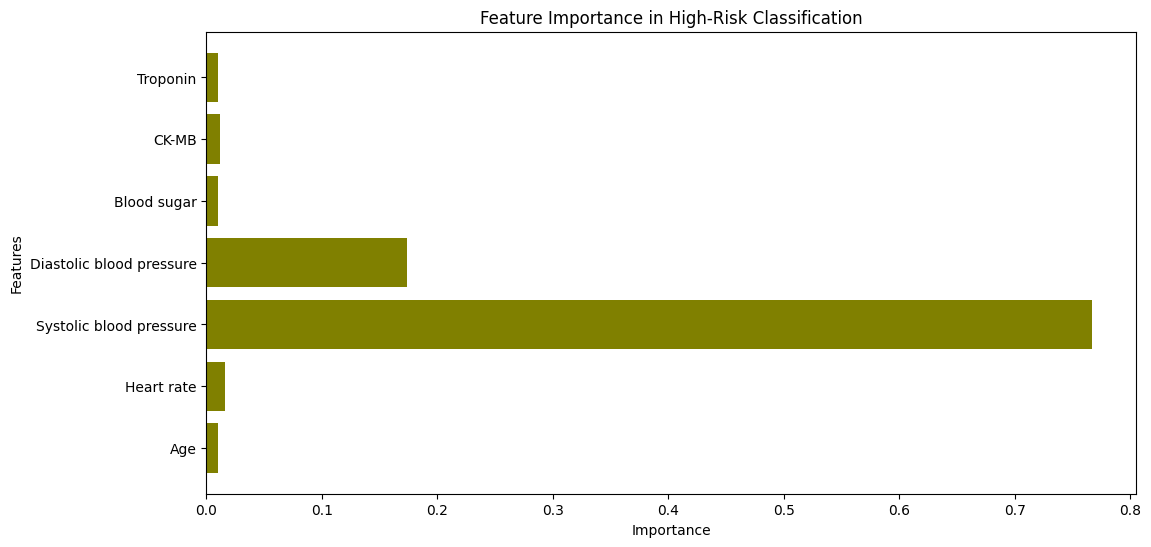

In [ ]:
# Features (Medical Parameters)
X = df[['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']]
y = df['Risk Category']  # Target variable (High-Risk vs. Low-Risk classification)
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Extract feature importance scores
importance = model.feature_importances_
features = X.columns
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, importance, color='olive')
plt.title("Feature Importance in High-Risk Classification")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# HEALTH RISK PREDICTION MODEL

Accuracy Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       177

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



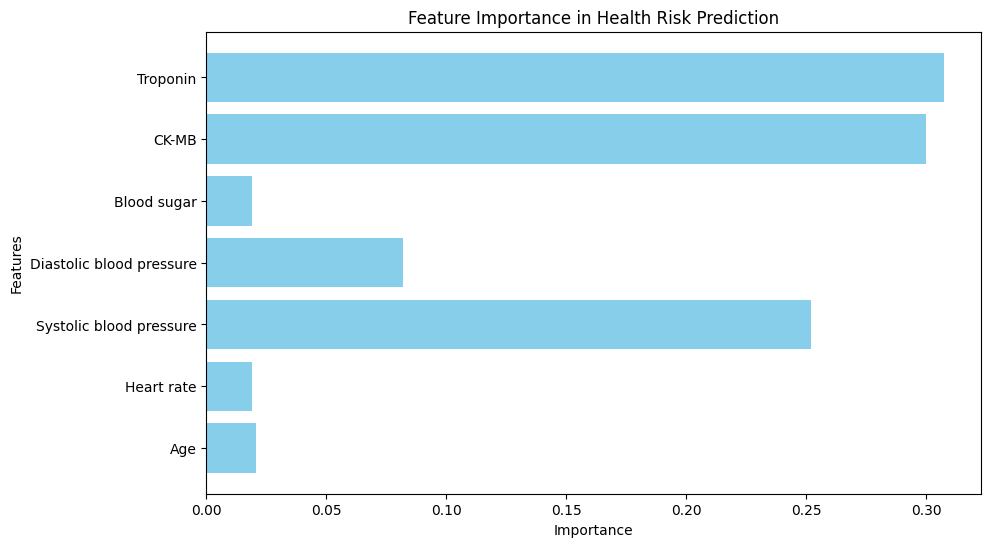

In [ ]:
# Define risk thresholds
threshold_systolic = 140
threshold_diastolic = 90
threshold_troponin = 0.04  # Example cutoff for Troponin risk
threshold_ckmb = 5.0  # Example cutoff for CKMB risk
# Classify patients as High-Risk (1) or Low-Risk (0)
df['Risk Category'] = df.apply(lambda row: 1 if row['Systolic blood pressure'] >= threshold_systolic or row['Diastolic blood pressure'] >= threshold_diastolic or row['Troponin'] >= threshold_troponin or row['CK-MB'] >= threshold_ckmb else 0, axis=1)
# Select features and target variable
X = df[['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']]
y = df['Risk Category']
# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
# Make predictions
y_pred = classifier.predict(X_test)
# Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Visualize Feature Importance
importance = classifier.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
plt.barh(features, importance, color='skyblue')
plt.title("Feature Importance in Health Risk Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()